# Space Server Project

# Problem Statement:

Context

I was looking for an unused and interesting dataset to improve my data science skills on when my professor mentioned the Sloan Digital Sky Survey which offers public data of space observations. As I found the data to be super insightful I want to share the data.



# Data Information

The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.



# Feature Description

The table results from a query which joins two tables (actuaclly views): "PhotoObj" which contains photometric data and "SpecObj" which contains spectral data.

View "PhotoObj"

objid = Object Identifier
ra = J2000 Right Ascension (r-band)
dec = J2000 Declination (r-band)

Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.

Source: https://en.wikipedia.org/wiki/Right_ascension

u = better of DeV/Exp magnitude fit
g = better of DeV/Exp magnitude fit
r = better of DeV/Exp magnitude fit
i = better of DeV/Exp magnitude fit
z = better of DeV/Exp magnitude fit

The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

Further education: https://www.astro.umd.edu/~ssm/ASTR620/mags.html

run = Run Number
rereun = Rerun Number
camcol = Camera column
field = Field number

Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by:

run number, which identifies the specific scan,
the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and
the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.

An additional number, rerun, specifies how the image was processed.

View "SpecObj"
specobjid = Object Identifier
class = object class (galaxy, star or quasar object)

The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

redshift = Final Redshift
plate = plate number
mjd = MJD of observation
fiberid = fiber ID

In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.

Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.

The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID.

# Inspiration

The dataset offers plenty of information about space to explore. Also, the class column is the perfect target for classification practices!

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [12]:
space=pd.read_csv('Space_Server_Dataset.csv')

In [13]:
space.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [15]:
space.shape

(10000, 18)

In [16]:
space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


The dataset has 10000 examples, 17 feature columns and 1 target column. 8 of the 17 features are 64 bit integers, 1 feature is an unsigned 64 bit integer, 8 are 64 bit floats and the target column is of the type object.

In [17]:
space.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

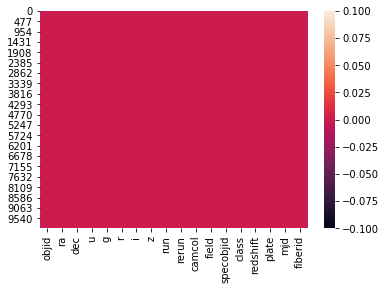

In [18]:
sns.heatmap(space.isnull())
plt.show()

In [19]:
space.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [20]:
space.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


<AxesSubplot:xlabel='class', ylabel='count'>

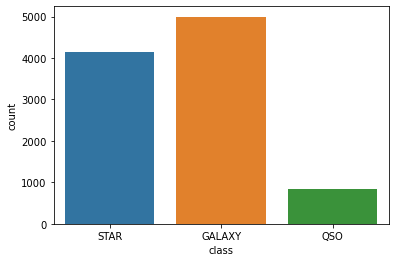

In [21]:
sns.countplot(space['class'])

In [22]:
space['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [23]:
# Drop useless columns
space.drop(["objid", "specobjid", "rerun"], axis = 1, inplace = True)

In [24]:
#check dataset  again
space.head()

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,STAR,0.000590,3306,54922,512


As we can see that, there are no missing values at all. This means: no imputing!
    
most of the features stay within a reasonable scale when comparing values within only one column while recognize this from the min, max and quartil rows.



# Exploratry Data Analysis

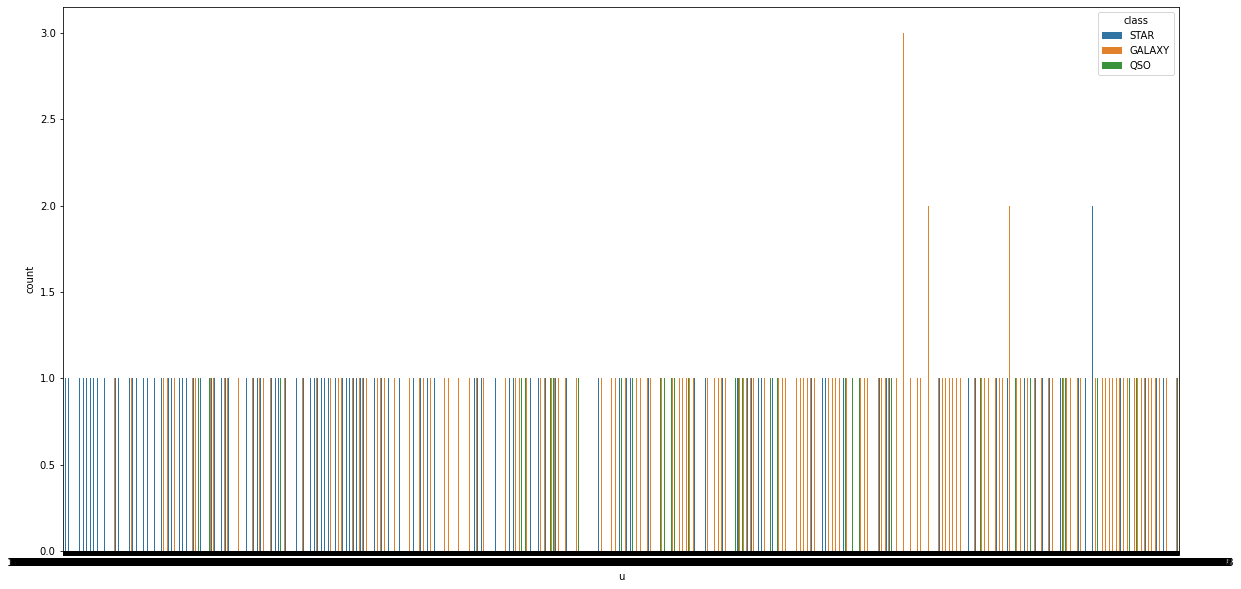

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(x="u",data=space,hue="class")
plt.show()

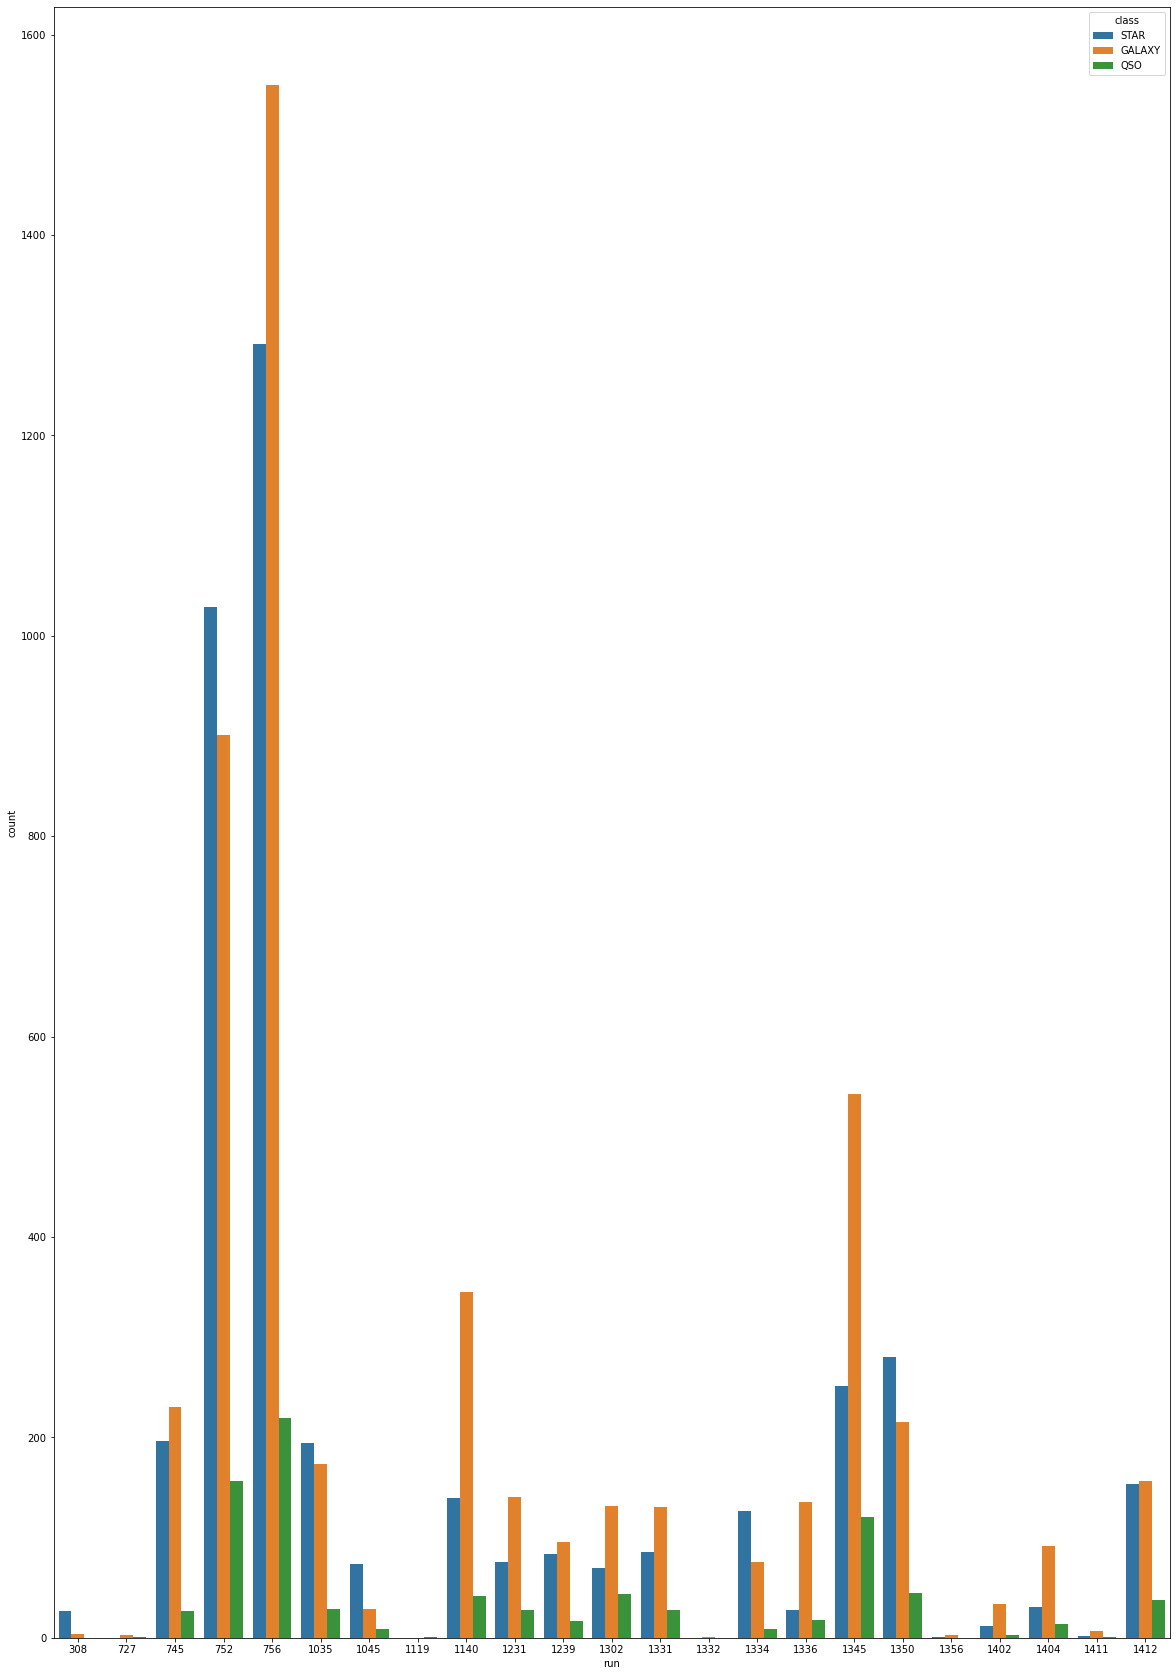

In [26]:
plt.figure(figsize=(20,30))
sns.countplot(x="run",data=space,hue="class")
plt.show()

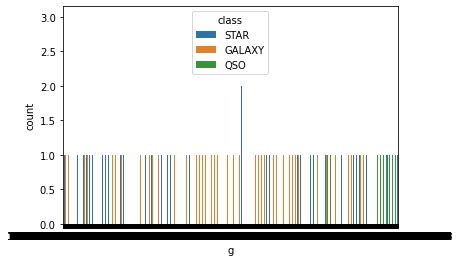

In [27]:
sns.countplot(x="g",data=space,hue="class")
plt.show()

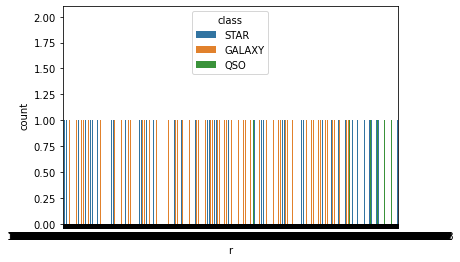

In [28]:
sns.countplot(x="r",data=space,hue="class")
plt.show()

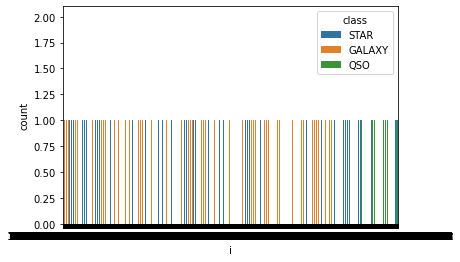

In [29]:
sns.countplot(x="i",data=space,hue="class")
plt.show()

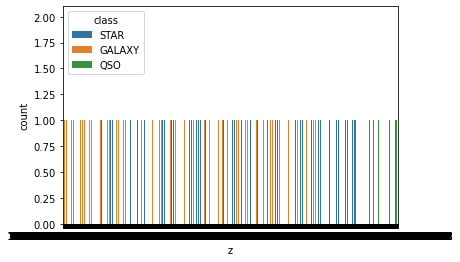

In [30]:
sns.countplot(x="z",data=space,hue="class")
plt.show()

<AxesSubplot:xlabel='camcol', ylabel='count'>

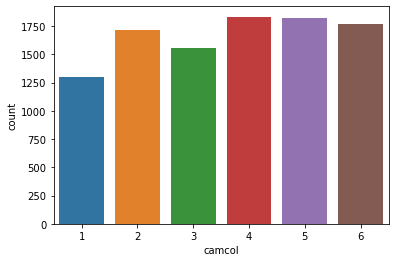

In [31]:
sns.countplot(space['camcol'])

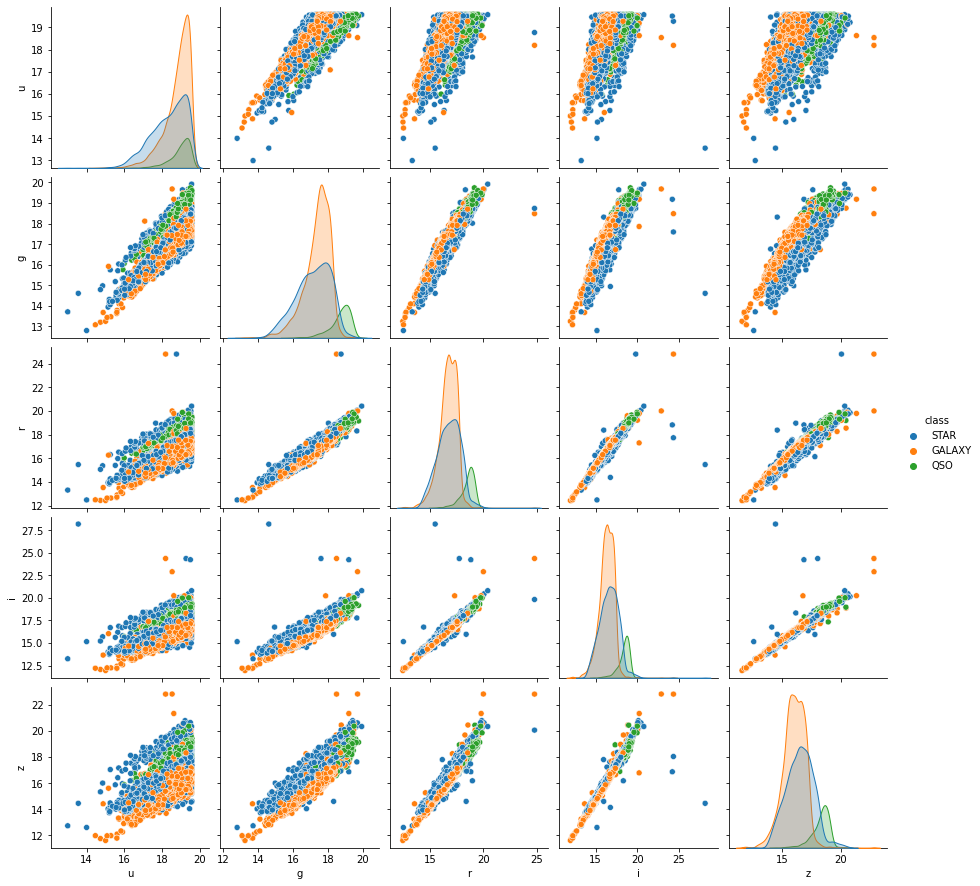

In [33]:
# checking astronomic magnitude values by classes using pairplot
sns.pairplot(space.loc[:,["u", "g", "r", "i", "z", "class"]], hue = "class")
plt.show()


In [34]:
# Check correlation between variables
space.corr()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid
ra,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,-0.092741,-0.006294,0.594700,0.030307,-0.095329,-0.086887,0.057485
dec,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.778385,0.114614,-0.131471,0.067021,0.088342,0.066147,0.155012
u,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.038229,0.009945,0.008548,0.163741,-0.129430,-0.168793,0.011301
g,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.058446,0.010223,0.014651,0.407576,-0.054981,-0.092772,0.047187
r,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.057261,0.010747,0.017133,0.441080,0.019787,-0.009345,0.061081
i,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.049765,0.013461,0.019781,0.431450,0.072958,0.050896,0.069977
z,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.048252,0.010930,0.018248,0.424034,0.112397,0.095658,0.067980
run,-0.092741,0.778385,0.038229,0.058446,0.057261,0.049765,0.048252,1.000000,0.151814,-0.463898,0.059056,0.093601,0.070354,0.138566
camcol,-0.006294,0.114614,0.009945,0.010223,0.010747,0.013461,0.010930,0.151814,1.000000,-0.067921,0.006834,0.040795,0.026284,0.535629
field,0.594700,-0.131471,0.008548,0.014651,0.017133,0.019781,0.018248,-0.463898,-0.067921,1.000000,0.015414,-0.093723,-0.086558,-0.040493


<AxesSubplot:>

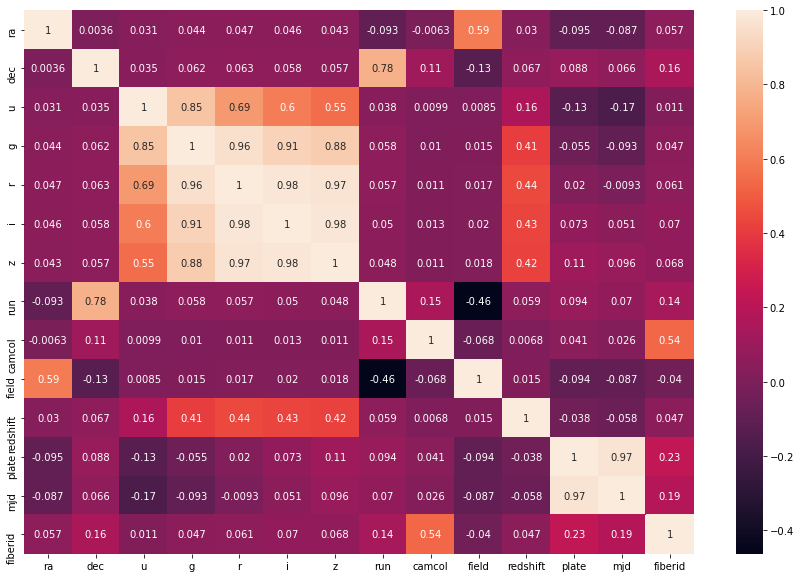

In [35]:
#Visualize correlaion with the help of heatmap
plt.figure(figsize=(15,10))
sns.heatmap(space.corr(),annot=True)

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
space['class']=le.fit_transform(space['class'])
space

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,2,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,0,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,0,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,3,162,2,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,0,0.014019,447,51877,229


In [37]:
space['class'].unique()

array([2, 0, 1])

In [38]:
# Checking the skewness
space.skew()

ra         -1.227350
dec         1.191544
u          -1.219795
g          -0.536293
r          -0.021673
i           0.286442
z           0.214313
run         0.412555
camcol     -0.100220
field       0.249795
class       0.169292
redshift    4.265729
plate       1.794609
mjd         1.039610
fiberid     0.308053
dtype: float64

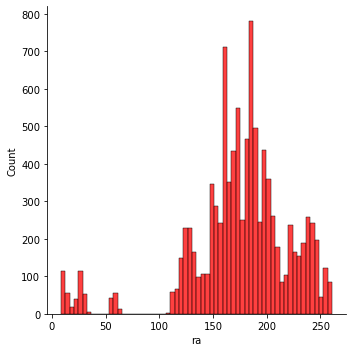

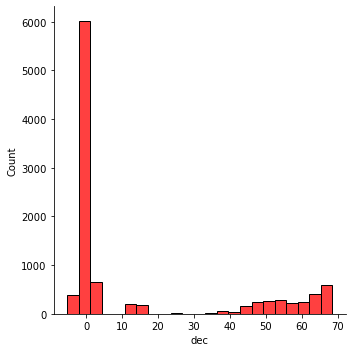

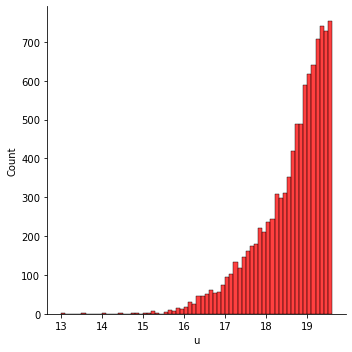

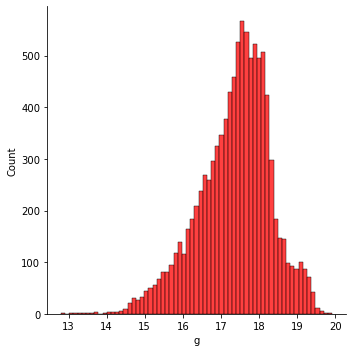

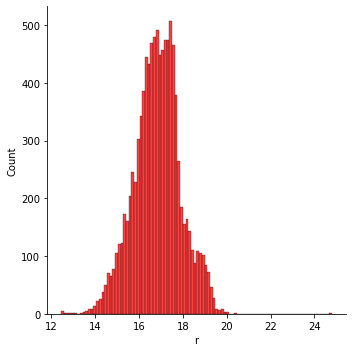

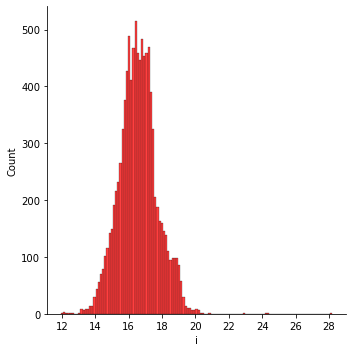

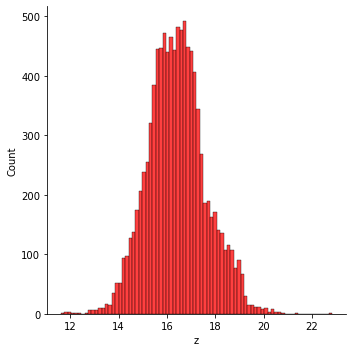

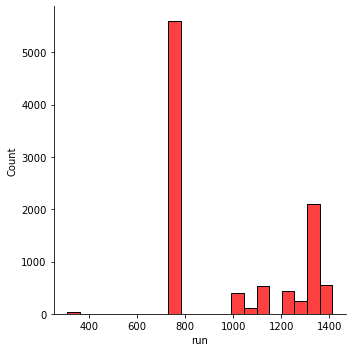

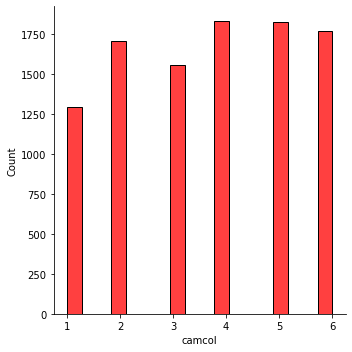

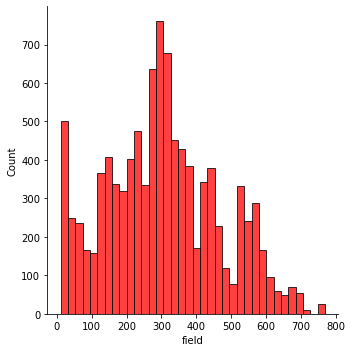

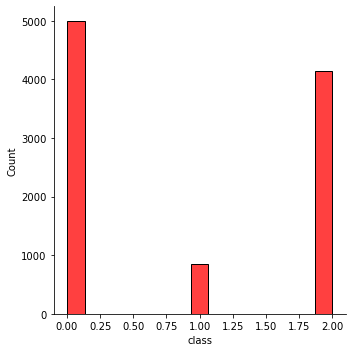

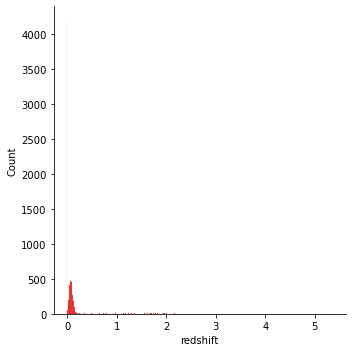

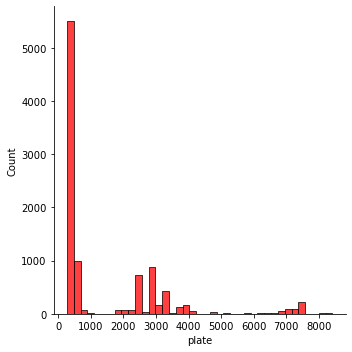

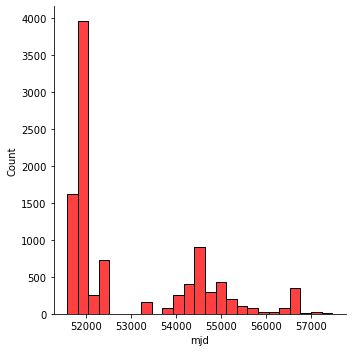

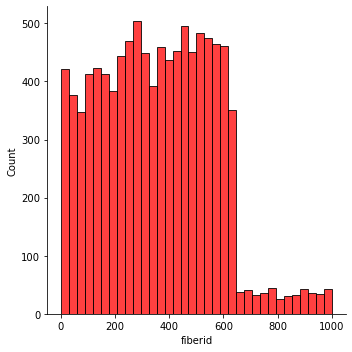

In [39]:
# To check the distribution of skewness
for col in space.describe().columns:
    sns.displot(space[col], color='r')
    plt.show()

In [41]:
#  treat the skewness 
from sklearn.preprocessing import power_transform
x=power_transform(space,method='yeo-johnson')

In [42]:
# checking skewness again
print(space.skew())
print("Total count of numeric features: ",len(space.skew()))
print("count of features which are significantly skewed: ",len(space.skew().loc[abs(space.skew())>0.5]))

ra         -1.227350
dec         1.191544
u          -1.219795
g          -0.536293
r          -0.021673
i           0.286442
z           0.214313
run         0.412555
camcol     -0.100220
field       0.249795
class       0.169292
redshift    4.265729
plate       1.794609
mjd         1.039610
fiberid     0.308053
dtype: float64
Total count of numeric features:  15
count of features which are significantly skewed:  7


# Plot Outliers

<Figure size 720x360 with 0 Axes>

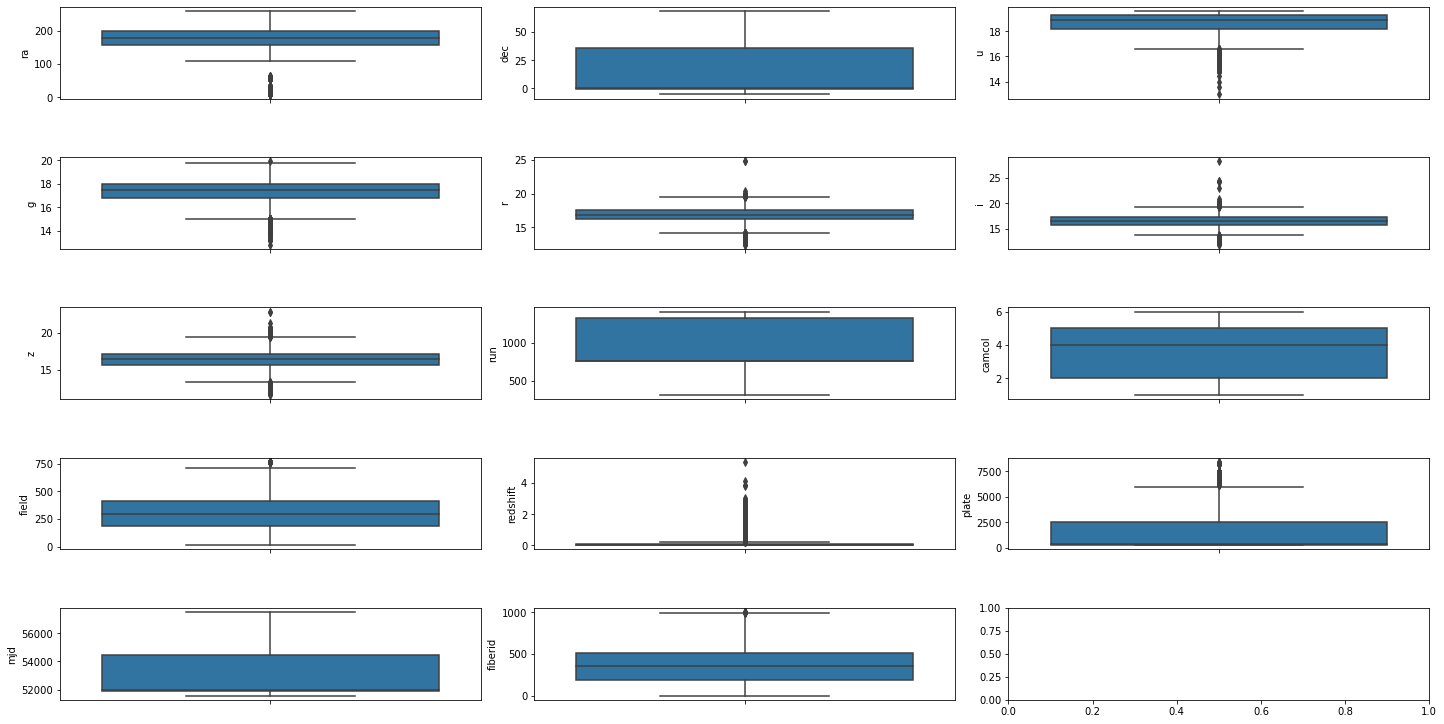

In [45]:
# Create Boxplots
plt.figure(figsize=(10,5))
fig, ax=plt.subplots(ncols=3,nrows=5, figsize=(20,10))
index=0
ax=ax.flatten()

for col, value in space.items():
    if col!='class':
        sns.boxplot(y=col, data=space, ax=ax[index])
        index+=1
        plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [44]:
# Removing Outliers
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(space))
threshold=3
print(np.where(z>3))

(array([  45,  109,  129, ..., 9992, 9994, 9997], dtype=int64), array([11, 11, 11, ..., 12, 12, 12], dtype=int64))


In [46]:
#remove Outliers
space_new=space[(z<3).all(axis=1)]
space_new

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,2,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,131.398915,51.533706,17.79613,16.02621,15.15955,14.71488,14.33840,1345,3,161,0,0.055515,447,51877,249
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,0,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,0,0.117772,447,51877,228
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,0,0.014019,447,51877,229


In [47]:
print(space.shape, '\n',space_new.shape)

(10000, 15) 
 (8698, 15)


# Model Training

In [48]:
#splitting data into input and output variable
x=space_new.drop("class",axis=1) #separating independent and target variable
y=space_new["class"]

In [49]:
#scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score

In [51]:
#Splittinfg the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [52]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_test,y_test)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print('*********************************************************************************************************************************')
    print('\n')

Accuracy score of LogisticRegression() is
0.9839080459770115
[[938   4  13]
 [ 10  72   0]
 [  1   0 702]]
*********************************************************************************************************************************


Accuracy score of GaussianNB() is
0.9701149425287356
[[929  22   4]
 [  7  75   0]
 [  7  12 684]]
*********************************************************************************************************************************


Accuracy score of SVC() is
0.9758620689655172
[[929   3  23]
 [ 11  71   0]
 [  5   0 698]]
*********************************************************************************************************************************


Accuracy score of DecisionTreeClassifier() is
0.9873563218390805
[[942  11   2]
 [  7  75   0]
 [  2   0 701]]
*********************************************************************************************************************************


Accuracy score of KNeighborsClassifier() is
0.9195402298850575


# To Find the best Parameters, Using GridSearchCV

In [53]:
from sklearn.model_selection import GridSearchCV
parameters={'C':[1,10],'random_state':range(42,100)}
lr=LogisticRegression()

clf=GridSearchCV(lr,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 10, 'random_state': 42}


In [54]:
#Logistic Regression with Best parameters

lr=LogisticRegression(C=10,random_state=42)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(classification_report(y_test,predlr))

0.9850574712643678
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       955
           1       0.95      0.88      0.91        82
           2       0.98      1.00      0.99       703

    accuracy                           0.99      1740
   macro avg       0.97      0.95      0.96      1740
weighted avg       0.98      0.99      0.98      1740



In [55]:
#cross validate Logistic Regression

score=cross_val_score(lr,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean:',score.mean())
print('Std',score.std())

[0.98563218 0.98908046 0.98965517 0.98217366 0.98734905]
Mean: 0.9867781060591037
Std 0.002698827707829751


In [56]:
parameters={'kernel':('linear','rbf','poly','sigmoid'),'C':[1,10],'random_state':range(42,60)}
svc=SVC()

clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 10, 'kernel': 'linear', 'random_state': 42}


In [57]:
#SVM with Best parameters

svc=SVC(kernel='linear',C=10,random_state=42,probability=True)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9885057471264368
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       955
           1       0.96      0.90      0.93        82
           2       0.99      1.00      0.99       703

    accuracy                           0.99      1740
   macro avg       0.98      0.96      0.97      1740
weighted avg       0.99      0.99      0.99      1740



In [58]:
#cross validate SVM

score=cross_val_score(svc,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean:',score.mean())
print('Std',score.std())

[0.98793103 0.99195402 0.99195402 0.98734905 0.99079931]
Mean: 0.989997488317371
Std 0.0019790616207580243


In [59]:
#K Neighbors classifier
parameters={'n_neighbors':range(22,25)}
knn=KNeighborsClassifier()

clf=GridSearchCV(knn,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_neighbors': 23}


In [60]:
#KNeighborsClassifier with Best parameters

knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(classification_report(y_test,predknn))

0.8988505747126436
              precision    recall  f1-score   support

           0       0.87      0.97      0.91       955
           1       0.97      0.76      0.85        82
           2       0.95      0.82      0.88       703

    accuracy                           0.90      1740
   macro avg       0.93      0.85      0.88      1740
weighted avg       0.90      0.90      0.90      1740



In [61]:
#cross validate KNeighborsClassifier

score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean:',score.mean())
print('Std',score.std())

[0.90747126 0.89655172 0.86954023 0.8706153  0.90166763]
Mean: 0.8891692279219793
Std 0.01597010750117964


In [62]:
#GaussianBoosting
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.9701149425287356
[[929  22   4]
 [  7  75   0]
 [  7  12 684]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       955
           1       0.69      0.91      0.79        82
           2       0.99      0.97      0.98       703

    accuracy                           0.97      1740
   macro avg       0.89      0.95      0.92      1740
weighted avg       0.97      0.97      0.97      1740



In [63]:
#cross validate Gaussion

score=cross_val_score(gnb,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean:',score.mean())
print('Std',score.std())

[0.98045977 0.97413793 0.96551724 0.94709603 0.96319724]
Mean: 0.9660816429048271
Std 0.011320124245214298


In [64]:
# Decision Tree Classifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.985632183908046
[[940  13   2]
 [  8  74   0]
 [  2   0 701]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       955
           1       0.85      0.90      0.88        82
           2       1.00      1.00      1.00       703

    accuracy                           0.99      1740
   macro avg       0.95      0.96      0.95      1740
weighted avg       0.99      0.99      0.99      1740



In [65]:
#cross validate Decision Tree Classifier

score=cross_val_score(dt,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean:',score.mean())
print('Std',score.std())

[0.98218391 0.98390805 0.98965517 0.97412306 0.98562392]
Mean: 0.9830988214920717
Std 0.005126755075490731


In [66]:
# Random Forest Classifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.9896551724137931
[[948   3   4]
 [ 10  72   0]
 [  1   0 702]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       955
           1       0.96      0.88      0.92        82
           2       0.99      1.00      1.00       703

    accuracy                           0.99      1740
   macro avg       0.98      0.96      0.97      1740
weighted avg       0.99      0.99      0.99      1740



In [67]:
#cross validate Random Forest Classifier

score=cross_val_score(rfc,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean:',score.mean())
print('Std',score.std())

[0.98793103 0.98965517 0.99022989 0.98332375 0.98964922]
Mean: 0.9881578129853992
Std 0.002536906549729934


In [68]:
#Saving our best model
import joblib

#save the model as a pickle file
joblib.dump(rfc,'Space_server_rfc.pkl')

['Space_server_rfc.pkl']